In [14]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

In [15]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [16]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [17]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_train.shape

(60000, 784)

In [18]:
input_size = 784
hidden_size = 64
output_size = 784

In [19]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
encoder=Model(inputs=x,outputs=h)


In [20]:
input_layer_decoder=Input(shape=(64,))
decoder_layer=autoencoder.layers[-1](input_layer_decoder)
decoder=Model(input_layer_decoder,decoder_layer)

In [21]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.fit(X_train,X_train,epochs=20,batch_size=256,shuffle=True,validation_data=(X_test,X_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3442 - val_loss: 0.2674
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.2567 - val_loss: 0.2425
Epoch 3/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.2307 - val_loss: 0.2175
Epoch 4/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2095 - val_loss: 0.2000
Epoch 5/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.1951 - val_loss: 0.1880
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.1848 - val_loss: 0.1789
Epoch 7/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.1766 - val_loss: 0.1715
Epoch 8/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.1699 - val_loss: 0.1654
Epoch 9/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.1640 - val_loss: 0.1599
Epoc

In [22]:
encoded_images=encoder.predict(X_test)
decoded_images=decoder.predict(encoded_images)

In [24]:
def visualize(data,size):
    n=8
    plt.figure(figsize=(20,4))
    plt.gray()
    for i in range(n):
        ax=plt.subplot(2,n,i+1)
        plt.imshow(data[i].reshape(size,size))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

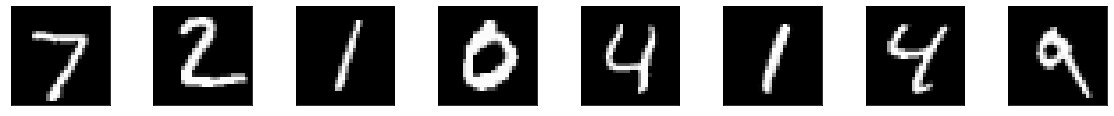

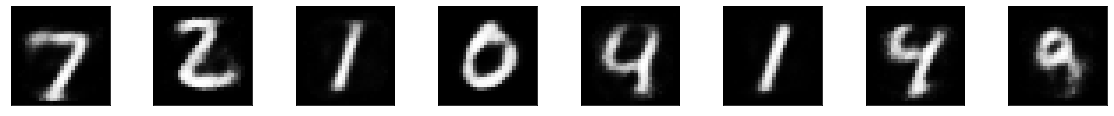

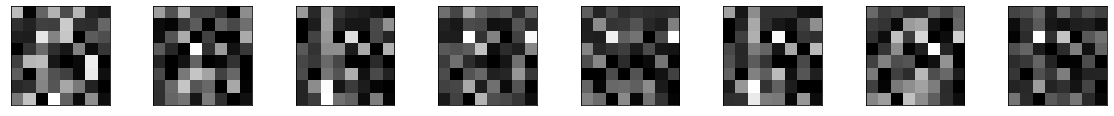

In [25]:
visualize(X_test,28)
visualize(decoded_images,28)
visualize(encoded_images,8)